# Perceptron Classifier from Scratch

## Overview 🤖
In this project, I’m implementing a custom **Perceptron model** using Python and NumPy, which demonstrates the basics of a binary linear classifier. The Perceptron algorithm is one of the earliest and simplest machine learning models, foundational to understanding more complex neural networks.

### Key Concepts:
- **Perceptron**: A type of linear classifier that separates data into two classes using a straight line (in 2D) or a hyperplane (in higher dimensions).
  
- **Linear Separability**: The Perceptron can only solve problems that are linearly separable, meaning the two classes can be perfectly divided by a straight line or hyperplane.
  
- **Binary Classification**: This model is focused on distinguishing between two classes, labeled as `1` and `0`.

---

## Objective 🎯
The main goals of this project are:
1. To implement a **Perceptron class** that can classify data into two categories.
   
2. To understand the **update rule** for the Perceptron, where weights and bias are adjusted to reduce misclassifications.
   
3. To visualize the decision boundary and observe how the Perceptron learns over iterations.

---

## Perceptron Explanation 🧠

<img src="./figures/perceptron.png" alt="perceptron" width="1000" height="700"/>

### Perceptron Formula
In the Perceptron model, the output prediction \( y_pred \) is determined using the formula:

$$
y_{\text{pred}} = \text{sign}(X \cdot w + b)
$$

Where:
- `X`: Input feature matrix.
- `w`: Weights vector for each feature.
- `b`: Bias term.
- `y_pred `: Predicted output, which is either `1` or `0` based on a threshold.

---

### Update Rule
The Perceptron uses the following **update rule** for weights \( w \) and bias \( b \) when there is a misclassification:

$$
w = w + \eta \cdot (y - y_{\text{pred}}) \cdot X
$$

$$
b = b + \eta \cdot (y - y_{\text{pred}})
$$

Where:
- `η`: Learning rate, which controls the size of the updates.
- `(y - y_pred)`: Error, or the difference between the actual and predicted labels.

> The **weights** and **bias** are adjusted based on this error to better classify the data points in the future.

---

## Implementation 🛠️

Below is the code for implementing the Perceptron classifier. The `Perceptron` class includes methods to:
1. **Fit the model**: Learn the optimal weights and bias to minimize misclassifications.
   
2. **Predict**: Use the learned weights and bias to predict new data points.
   
3. **Track Errors**: Keep track of errors over each iteration to observe the model's learning progress.

---

## Visualization 📊
After training, we can visualize:
1. The **decision boundary** formed by the Perceptron.
   
2. The **training progress** by plotting the number of misclassifications in each epoch.

# Generating Synthetic Data for Binary Classification

In this section, we generate synthetic data for a binary classification task. We simulate two classes (class 1 and class 0) using a normal distribution to create linearly separable data.

The code below performs the following steps:

1. **Set Seed for Reproducibility**: We set a random seed using `np.random.seed(1)` to ensure that the results can be reproduced.
   
2. **Generate Class 1 Data**: We create 50 data points for class 1, distributed around the point `[2, 2]` with a standard deviation of `0.5` for each feature.
   
3. **Generate Class 0 Data**: Similarly, we create 50 data points for class 0, distributed around the point `[0, 0]` with the same standard deviation of `0.5`.
   
4. **Combine the Data**: The class 1 and class 0 data points are then combined into a single dataset `X`, and the corresponding labels (`y`) are created.


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(1)

# Generate class 1
X1 = np.random.normal(loc=[2, 2], scale=0.5, size=(50, 2))
y1 = np.ones(50)

# Generate class 0
X0 = np.random.normal(loc=[0, 0], scale=0.5, size=(50, 2))
y0 = np.zeros(50)

# Combine class data
X = np.vstack((X1, X0))
y = np.hstack((y1, y0))

# Visualizing the Synthetic Data

Before we proceed with training the Perceptron model, it's important to visualize the dataset. This helps us understand the distribution of the two classes (class 1 and class 0) and verify that the data is linearly separable.

The code below creates a scatter plot of the data points. Class 1 points will be shown as blue circles, while class 0 points will be red crosses. This visualization will give us a clear idea of how the classes are distributed in the 2D feature space.


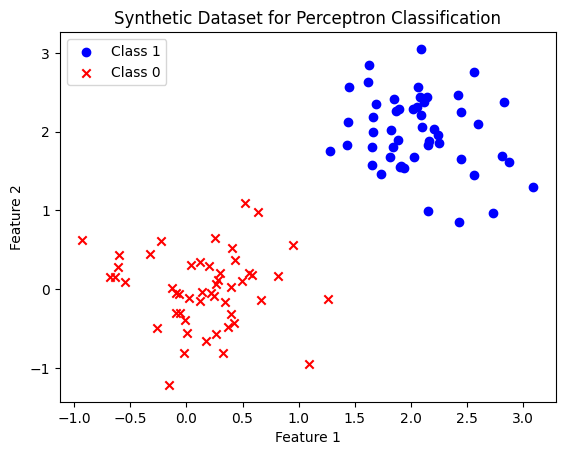

In [13]:
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='o', label='Class 1')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='x', label='Class 0')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title("Synthetic Dataset for Perceptron Classification")
plt.show()

# Implementing the Perceptron Algorithm

In this section, we will implement the Perceptron algorithm from scratch. The Perceptron is one of the simplest linear classifiers, and it works well when the classes are linearly separable. The algorithm aims to find a decision boundary that best separates the two classes.

### Key Components of the Perceptron Algorithm:
The Perceptron is composed of a few important parts, each of which is implemented in the following methods:

1. **Initialization (`__init__` Method)**:

   - The `eta` parameter (learning rate) controls how much the weights are adjusted with each update. A small `eta` means slower learning, and a larger `eta` may make the model converge faster but could cause instability.
  
   - The `n_iter` parameter specifies how many times the model will iterate over the entire training data. More iterations typically improve performance, especially on more complex data.
  
   - The `random_state` ensures that the random number generation (for weight initialization) is consistent across runs, making the results reproducible.

2. **Fit Method (`fit` Method)**:
  
   - The `fit` method is responsible for training the Perceptron. It adjusts the model’s weights by iterating through the dataset and updating the weights whenever a misclassification occurs. 
  
   - **Weight Initialization**: The weights are initialized randomly using a normal distribution with a mean of 0 and a small standard deviation (0.01). This randomness is important because starting with random weights ensures that the model does not have any initial bias toward one class.
  
   - **Error Calculation and Update**: The Perceptron calculates the error by comparing the predicted class label to the actual label. If there is a mistake (i.e., the prediction is wrong), the weights are updated using the formula:
     
     > **New weight = Old weight + (Learning rate × Error × Input features)**


   
   - **Bias Update**: The bias term is updated similarly by adding the learning rate times the error:
  
     > **New bias = Old bias + (Learning rate × Error)**

   - **Error Tracking**: The method keeps track of the number of errors at each iteration for analysis, stored in `errors_`.

3. **Net Input Method (`net_input`)**:
   - The `net_input` method calculates the weighted sum of the inputs plus the bias:
  
     > **z = (Weight vector w × Input features x) + Bias b**
     
   - This value is used to determine the predicted class label.

4. **Prediction Method (`predict`)**:
 
   - The `predict` method takes the net input value and applies the step function:

     - If the net input is greater than or equal to zero, the class is predicted as `1`.
     - Otherwise, the class is predicted as `0`.


In [14]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        """
        Initializes the Perceptron with the given hyperparameters.
        
        Parameters:
        eta (float): Learning rate (default is 0.01).
        n_iter (int): Number of iterations (epochs) to train the model (default is 50).
        random_state (int): Seed for random number generation to ensure reproducibility (default is 1).
        """
        self.eta = eta  # Learning rate
        self.n_iter = n_iter  # Number of training iterations
        self.random_state = random_state  # Random seed for initialization

    def fit(self, X, y):
        """
        Trains the Perceptron model on the provided training data.

        Parameters:
        X (array-like): Feature matrix (n_samples x n_features).
        y (array-like): Target labels (n_samples,).
        
        Returns:
        self: Fitted model.
        """
        # Initialize random number generator with a specific seed
        rgen = np.random.RandomState(self.random_state)
        
        # Initialize weights (w_) with small random values, and bias (b_) as 0
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])  # Random weights for each feature
        self.b_ = np.float64(0.)  # Bias term initialized to 0
        self.errors_ = []  # List to keep track of errors during training
        
        # Loop through the number of iterations (epochs)
        for _ in range(self.n_iter):
            errors = 0  # Reset error count for this iteration
            # Loop through each sample in the training data
            for xi, target in zip(X, y):
                # Calculate the update for weights based on prediction error
                update = self.eta * (target - self.predict(xi))  # Calculate weight update
                self.w_ += update * xi  # Update weights for each feature
                self.b_ += update  # Update bias
                errors += int(update != 0.0)  # Increment error count if update is non-zero (i.e., prediction was wrong)
            self.errors_.append(errors)  # Append error count for this epoch
        return self  # Return the trained model

    def net_input(self, X):
        """
        Computes the net input to the perceptron (weighted sum of inputs + bias).
        
        Parameters:
        X (array-like): Input features (1D array or matrix).
        
        Returns:
        np.ndarray: Net input (sum of weighted inputs + bias).
        """
        return np.dot(X, self.w_) + self.b_  # Weighted sum of inputs + bias

    def predict(self, X):
        """
        Predicts the class label for the given input.
        
        Parameters:
        X (array-like): Input features (1D array or matrix).
        
        Returns:
        np.ndarray: Predicted class labels (0 or 1).
        """
        # Classify based on whether the net input is >= 0 (class 1) or < 0 (class 0)
        return np.where(self.net_input(X) >= 0.0, 1, 0)

## Training the Perceptron Model

In this step, we initialize and train the Perceptron model with a learning rate (\(\eta\)) of 0.01 and set it to run for 10 epochs. The model is trained using the synthetic data we generated earlier.

- **Perceptron Initialization**: We initialize the Perceptron with a learning rate of 0.01 and 10 iterations (epochs). Each iteration will involve updating the weights and bias based on the error in the predictions.
  
- **Training**: We then call the `fit()` method to train the Perceptron model on our data, where it will adjust its weights and bias according to the learning rule.

- **Output**: After training, we print the final weights, bias, and the number of errors encountered during each epoch. This gives us insight into the learning process.


In [15]:
# Initialize Perceptron with learning rate 0.01 and 10 epochs
ppn = Perceptron(eta=0.01, n_iter=10)
ppn.fit(X, y)

# Print final weights and bias
print("Weights:", ppn.w_)
print("Bias:", ppn.b_)
print("Errors over epochs:", ppn.errors_)

Weights: [0.02360989 0.00062777]
Bias: -0.03
Errors over epochs: [2, 3, 0, 0, 0, 0, 0, 0, 0, 0]


## Visualizing the Decision Boundary

In this step, we visualize the decision boundary learned by the Perceptron model on the synthetic dataset. We plot the data points for both classes and the decision boundary that separates them.

- **Data Points**: The data points for Class 1 are shown as blue circles (`o`), and for Class 0 as red crosses (`x`). These data points were generated earlier.
  
- **Decision Boundary**: The Perceptron algorithm learns a decision boundary that separates the two classes. We calculate this boundary by plotting a contour plot based on the Perceptron's predictions for a grid of points spanning the feature space. The `contourf` function fills the regions where the model predicts Class 1 or Class 0.



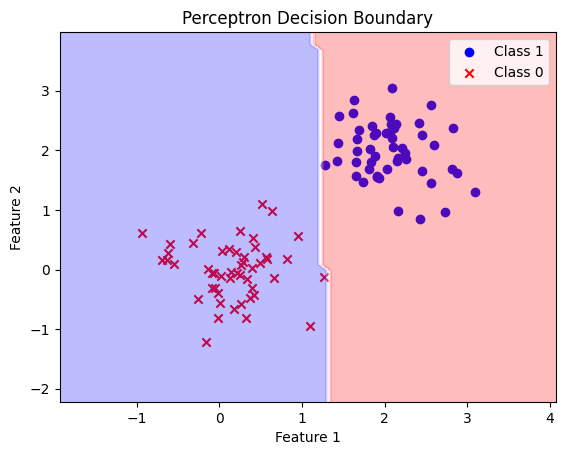

In [16]:
# Plot data points
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='o', label='Class 1')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='x', label='Class 0')

# Decision boundary line
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                       np.arange(x2_min, x2_max, 0.1))
Z = ppn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=plt.cm.bwr)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title("Perceptron Decision Boundary")
plt.show()

## Plotting Errors Over Epochs

In this section, we visualize how the number of updates (or errors) changes over the training epochs. This plot helps us understand the learning process of the Perceptron algorithm and how the model improves over time.

- **Epochs**: The x-axis represents the number of epochs (iterations) the Perceptron model has gone through.
  
- **Number of Updates (Errors)**: The y-axis shows the number of updates (or errors) made by the model during each epoch. This is the number of times the Perceptron adjusted its weights due to misclassification of data points.


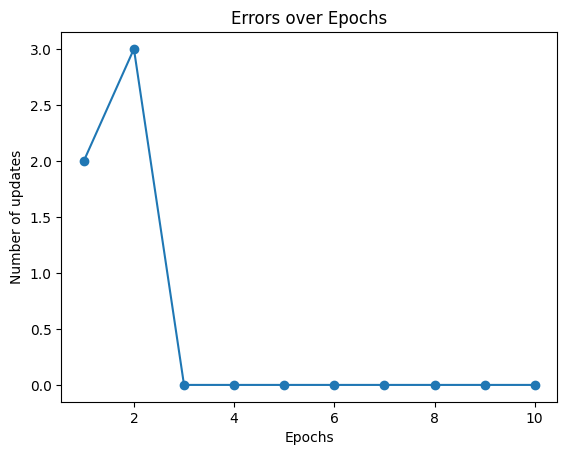

In [17]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title("Errors over Epochs")
plt.show()

# When to Use the Perceptron Algorithm 📈

The Perceptron is a fundamental algorithm in machine learning, especially effective in binary classification tasks. Here are scenarios where using the Perceptron algorithm can be advantageous:

- **Binary Classification Problems**: The Perceptron is designed for classifying data into two distinct classes, such as "spam" vs. "not spam" or "default" vs. "no default."
  
- **Linearly Separable Data**: It works best when the classes are linearly separable, meaning they can be divided by a straight line (or hyperplane in higher dimensions).
  
- **Fast and Efficient Training**: The Perceptron is computationally efficient, making it suitable for tasks that require quick training on linearly separable data.
  
- **Interpretable Decision Boundary**: For linearly separable data, the Perceptron provides an interpretable decision boundary that separates the two classes.
  
- **Low Computational Complexity**: The algorithm is simple and has low computational requirements, which can be beneficial for tasks with limited computational resources or when a quick, interpretable model is needed.

---

# Pros of the Perceptron Algorithm ✅

- **Simplicity**: The Perceptron is a simple algorithm that’s easy to understand and implement, making it a great starting point for binary classification tasks.
  
- **Quick Convergence for Linearly Separable Data**: For data that is linearly separable, the Perceptron converges quickly to an optimal solution.
  
- **Interpretable Weights and Bias**: The learned weights and bias can provide insight into the influence of each feature on the classification decision.
  
- **Foundation for Neural Networks**: The Perceptron serves as the building block for more complex neural network architectures, providing foundational understanding for neural networks.

---

# Cons of the Perceptron Algorithm ❌

- **Limited to Linearly Separable Data**: The Perceptron cannot solve problems where the classes are not linearly separable, as it only adjusts weights to classify linearly.
  
- **Sensitive to Outliers**: Outliers can significantly affect the model’s decision boundary, leading to suboptimal performance.
  
- **Binary Classification Only**: The basic Perceptron is limited to binary classification tasks and does not extend to multi-class classification without modifications.
  
- **Does Not Handle Non-Linear Patterns**: The Perceptron assumes that a linear boundary can separate classes, so it struggles with datasets where the boundary is nonlinear.
  
- **Lacks Probability Estimation**: The Perceptron only provides class labels without a measure of confidence or probability for its predictions.

---

# Additional Considerations for Using the Perceptron

- **Learning Rate Sensitivity**: The Perceptron can be sensitive to the choice of learning rate, which impacts the speed of convergence and whether the model will converge at all.
  
- **Online Learning**: The Perceptron algorithm can be trained in an online learning fashion (one sample at a time), which can be useful for scenarios with large datasets or streaming data.

---

## Conclusion 🎯

The Perceptron is an effective and interpretable algorithm for binary classification tasks with linearly separable data. Its simplicity and foundational role in neural networks make it valuable for understanding classification principles, though its limitations must be considered when handling complex or non-linear data.